# Simple Linear Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
df = pd.read_csv('Salary_Data.csv')
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

In [3]:
df.shape

(30, 2)

## Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, random_state=0)

## Training the Simple Linear Regression model on the Training set

In [13]:
X_train, X_test

(array([[ 2.9],
        [ 5.1],
        [ 3.2],
        [ 4.5],
        [ 8.2],
        [ 6.8],
        [ 1.3],
        [10.5],
        [ 3. ],
        [ 2.2],
        [ 5.9],
        [ 6. ],
        [ 3.7],
        [ 3.2],
        [ 9. ],
        [ 2. ],
        [ 1.1],
        [ 7.1],
        [ 4.9],
        [ 4. ]]),
 array([[ 1.5],
        [10.3],
        [ 4.1],
        [ 3.9],
        [ 9.5],
        [ 8.7],
        [ 9.6],
        [ 4. ],
        [ 5.3],
        [ 7.9]]))

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [10]:
regressor.coef_, regressor.intercept_, regressor.singular_

(array([9345.94244312]), 26816.192244031176, array([11.31733184]))

## Predicting the Test set results

In [11]:
y_pred = regressor.predict(X_test)

In [12]:
r2_score(Y_test,y_pred)

0.9749154407708353

## Visualising the Training set results

In [14]:
%matplotlib notebook

<IPython.core.display.Javascript object>


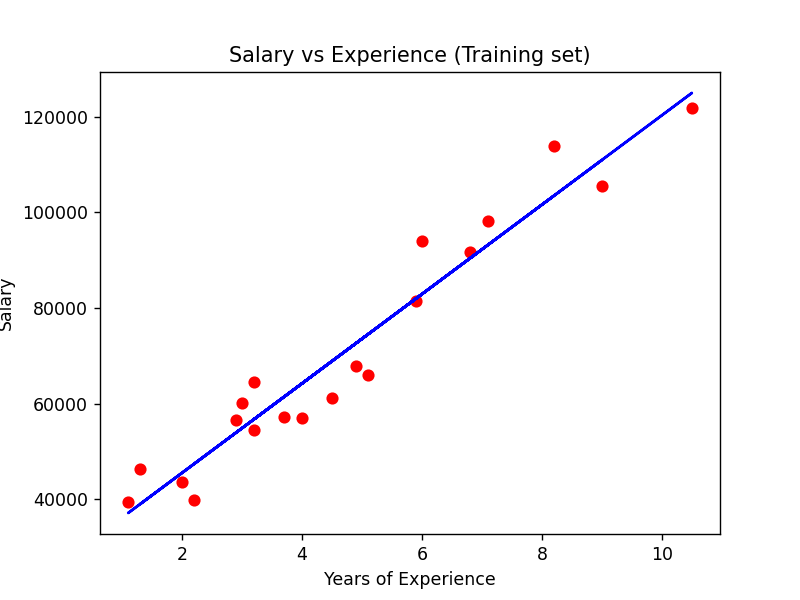

In [15]:
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Visualising the Test set results

<IPython.core.display.Javascript object>


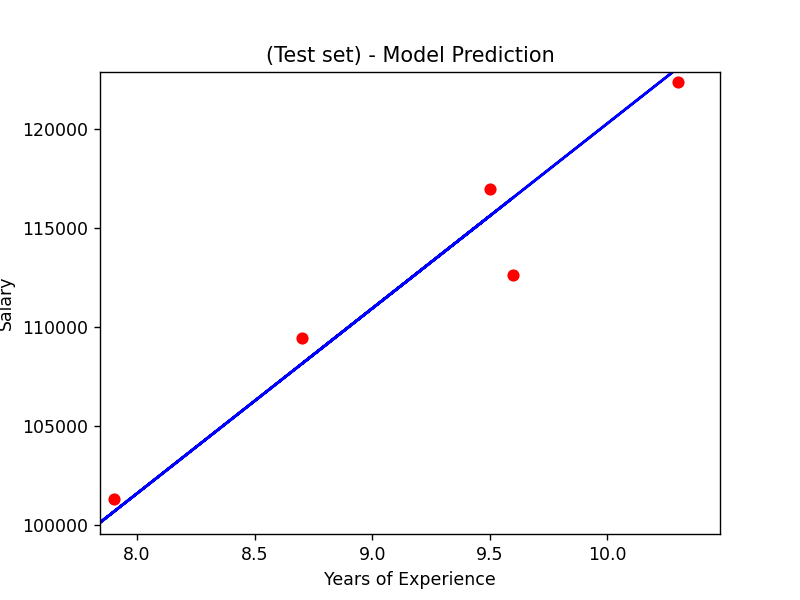

In [17]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_test, y_pred, color = 'blue')
plt.title('(Test set) - Model Prediction')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [12]:
regressor.predict([[10]])    # predicting a single value

array([120275.61667525])

In [13]:
m, c = regressor.coef_[0], regressor.intercept_
x_ = 12.5
y_ =  m*x_ + c
y_

143640.47278306086

In [42]:
regressor.singular_ # I wonder what this attribute is

array([11.31733184])

## Own implementation of Linear Regression using formula of slope

In [39]:
def cal_params(Xtrain, Ytrain):
    """
    arguments = (X_train, Y_train)
    Returns the parameters of regression line slope, intercept & centroid
    """
    
    
    # function for calculating slope
    def cal_m():
        """
        m = SUM((x-x_)(y-y_)) / SUM((x-x_)**2)
        where: 
            x = individual independent variable datapoint of training set
            y = individual dependent variable datapoint of training set
            x_ = mean of independent variable
            y_ = mean of dependent variable

        Return (mean, x_, y_)
        """
        x_ = sum(Xtrain)/len(Xtrain)
        y_ = sum(Ytrain)/len(Ytrain)
        num = den = 0
        for x,y in zip(Xtrain,Ytrain):
            num += (x-x_)*(y-y_)
            den += (x-x_)**2

        return (num/den, x_, y_)
    
    
    # function for calculating intercept
    def cal_c():
        """
        c = y_ - m*x_
        Returns (c, centroid)
        """
        c = y_ - m*x_
        centroid = (x_[0], y_)
        return c, centroid
        
    m, x_, y_ = cal_m()
    c, centroid = cal_c()
    
    return (m, c, centroid)

In [40]:
m, c, mu = cal_params(X_train, Y_train)

In [44]:
m, c, mu

(array([9345.94244312]),
 array([26816.19224403]),
 (4.7299999999999995, 71022.5))

In [50]:
Y_predicted = m * X_test + c

In [56]:
r2_score(Y_test, Y_predicted)

0.9749154407708353

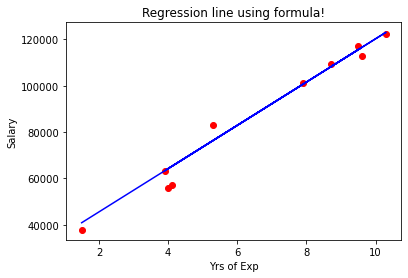

In [57]:
plt.scatter(X_test, Y_test, color= 'red')
plt.plot(X_test, Y_predicted, color='blue')
plt.xlabel('Yrs of Exp')
plt.ylabel('Salary')
plt.title('Regression line using formula!')
plt.show()

<IPython.core.display.Javascript object>


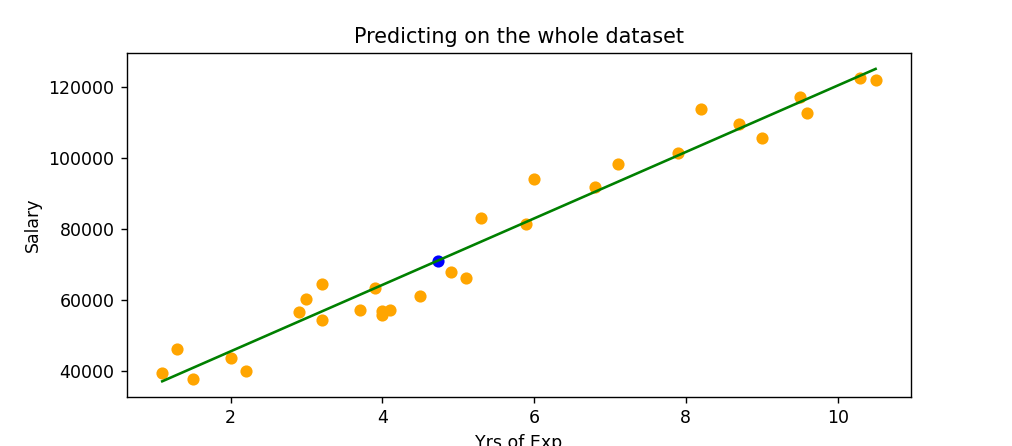

In [62]:
%matplotlib notebook
plt.scatter(X, Y, color='orange')
plt.plot(X, m*X + c, color='green')
plt.scatter(mu[0], mu[1], color='blue')
plt.xlabel('Yrs of Exp')
plt.ylabel('Salary')
plt.title('Predicting on the whole dataset')
plt.show()

In [91]:
total_y_predicted = m*X + c         # regression line with IV
# y_ is our mean line without IV

SST = sum((Y - y_)**2)
SSR = sum((Y - total_y_predicted)**2)

In [90]:
X = X.reshape((30, ))

In [98]:
SST_ = SST/(SST+1)
SSR_ = SSR/(SSR+1)

In [102]:
SST_, SSR_

(0.9999999999937123, 0.9999999989443897)

In [107]:
r2_score(Y, total_y_predicted)

0.9565349708076958

In [108]:
(SST - SSR)/SST

0.9940435080308099

In [109]:
xsample = np.array([2,3,4,5])
ysample = np.array([12,15,16,21])
ysample_predicted = np.array([13,14,17,20])

In [111]:
sst = sum((ysample - ysample.mean())**2)
ssr = sum((ysample - ysample_predicted)**2)

In [117]:
sum((ysample - ysample_predicted)**2)

4

In [132]:
reg = LinearRegression()
reg.fit(X,Y)

LinearRegression()

In [136]:
full_df_reg_pred = reg.predict(X)

In [137]:
r2_score(Y, full_df_reg_pred), r2_score(Y, total_y_predicted)

(0.9569566641435086, 0.9565349708076958)

In [138]:
(SST - SSR)/SST

0.9940435080308099